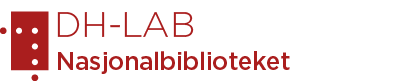

In [1]:
from dhlab.module_update import css
import dhlab.nbtext as nb
import dhlab.token_map as tm
import dhlab.graph_networkx_louvain as gnl
css()

# 1. Undersøk korpus med metadata


En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 



## 1.1. Bygg korpus

Korpuset defineres med metadata som dewey, emneord, navn , år, etc. Her kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for ulike måter å definere korpus.

In [5]:
# ddk 335 er sosialisme

bøker = nb.book_corpus(
    period=(1950, 2020),
    #title='%',
    #subject='',
    ddk='306.76%', limit=300)

In [6]:
bøker

,urn,author,title,year
0,2014013106088,"Nordbø, Arnfinn",Betre død enn homofil?,2009
1,2016093008047,"Arterburn, Jerry",Hva vil mor si -,1989
2,2015090706160,"Kristiansen, Hans W.",Masker og motstand,2008
3,2014051508085,,Med regnbuen som våpen,1995
4,2013062106129,"Chepstow-Lusty, Lill-Ann",Gay kids,2008
5,2010090208061,"Jon, Nina",Biseksuelle menn - seksuell praksis og hiv-for...,1998
6,2014022006154,,Lesbiske og homofile i møte med helse- og sosi...,2006
7,2014110708160,"Arntzen, Marion",Mann er da kvinne,2011
8,2015102608073,"Benestad, Esben Esther Pirelli",Transekjønn og diagnoser,2004
9,2013013108075,"Hellesund, Tone",Identitet på liv og død,2008


## 1.2. Undersøk forskjeller

### 1.2.1. Undersøk forskjeller internt i korpuset

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [7]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = nb.get_corpus_text(nb.pure_urn(bøker)[:5])

In [8]:
bøker_dtm

,2014013106088,2016093008047,2015090706160,2014051508085,2013062106129
.,2579.0,2730.0,4226.0,3021.0,2215.0
",",2338.0,1619.0,4147.0,2599.0,1443.0
og,1948.0,1298.0,2913.0,2367.0,1233.0
det,1189.0,1059.0,1578.0,1240.0,675.0
i,1114.0,738.0,3061.0,1946.0,1010.0
at,1044.0,909.0,1432.0,828.0,550.0
er,1044.0,441.0,539.0,954.0,990.0
eg,932.0,NaN,1.0,25.0,4.0
som,881.0,803.0,2132.0,1362.0,814.0
å,849.0,1264.0,1059.0,1068.0,645.0


#### 1.2.1.1. Visualiser med varmekart

Et varmekart gjør det enklere å få øye på likhet og variasjon i tallene.

In [9]:
nb.heatmap(bøker_dtm.head(50), color='#045599')

,2014013106088,2016093008047,2015090706160,2014051508085,2013062106129
.,2579,2730,4226,3021,2215
",",2338,1619,4147,2599,1443
og,1948,1298,2913,2367,1233
det,1189,1059,1578,1240,675
i,1114,738,3061,1946,1010
at,1044,909,1432,828,550
er,1044,441,539,954,990
eg,932,0,1,25,4
som,881,803,2132,1362,814
å,849,1264,1059,1068,645


### 1.2.2. Undersøk forskjeller med frekvenser fra bokhylla

Tre hundre bøker tar en tid å laste ned og telle opp lokalt så vi teller på server med passende kommando:

In [10]:
bøker_agg = nb.aggregate_urns(nb.pure_urn(bøker))

Så konverteres listen over ord og tall til en dataramme

In [11]:
bøker_df = nb.frame_sort(nb.frame(bøker_agg, 'count'))

For referanse henter vi ut de 50000 mest frekvente ordene i bokhylla.

In [12]:
totals = nb.frame(nb.totals(50000), 'tot')

Sånn ser frekvensene ut for bøkene

In [13]:
bøker_df.head(10)

,count
.,147877
",",131814
og,81813
i,63849
som,51557
det,48984
er,42379
å,39514
at,36763
av,36675


.. og sånn for bokhylla

In [14]:
totals.head(10)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


Vi finner forskjellen ved å dividere den ene på den andre:

In [15]:
forskjell = bøker_df['count']/totals['tot']

Tallene må sorteres, de høyeste tolkes til å være de mest relevante

In [16]:
bøker_typiske_ord = nb.frame_sort(nb.frame(forskjell, 'ratio'))
bøker_typiske_ord.head(50)

,ratio
lesbiske,0.201788
homofile,0.150108
homofil,0.116969
homoseksuelle,0.080251
sexual,0.021999
parforhold,0.015607
seksualitet,0.014746
seksualiteten,0.013625
homo,0.013557
aids,0.011136


#### 1.2.2.1. Visualiser som ordsky

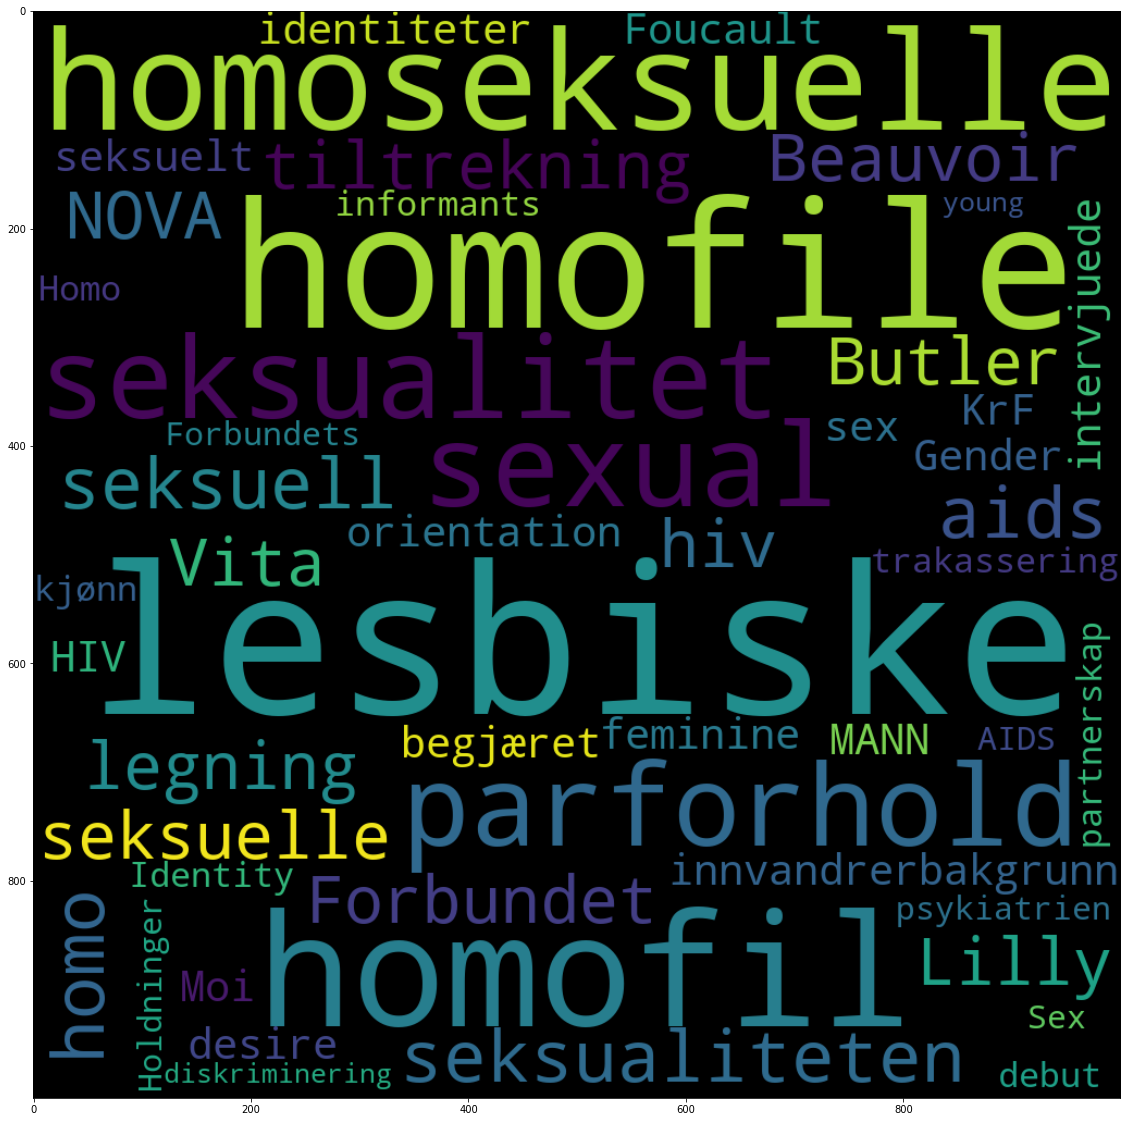

In [17]:
nb.cloud(bøker_typiske_ord.head(50))

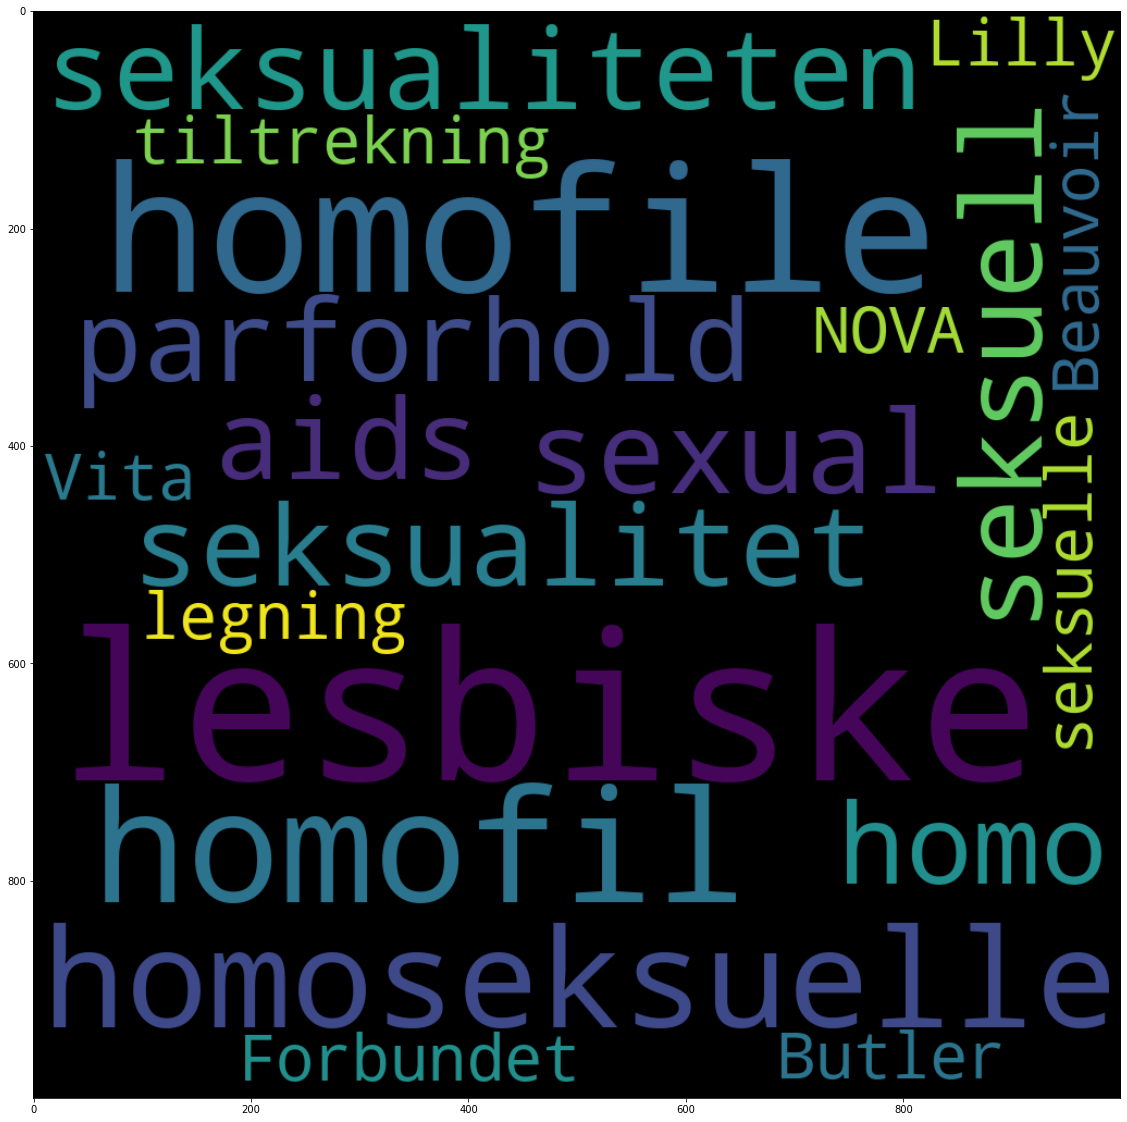

In [18]:
# velg hvor mange ord som skal være med i ordskyen
nb.cloud(bøker_typiske_ord.head(20))

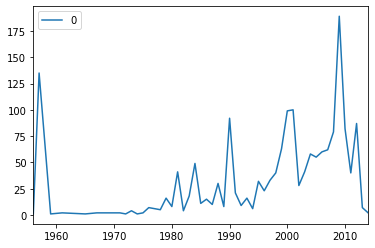

In [23]:
nb.unigram("homofil", publisher="Asche%").plot()

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)